In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import sklearn
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import validation_curve
from sklearn.feature_selection import SelectFromModel


# BUT DU PROJET :

Avant tout, précisons quelques points :
1.   Nous cherchons à prédire le prix des voitures d'occasion en fonction de certaines caractéristiques de ces voitures
2.  Le choix de ce dataset nous parait pertinent. En effet :
*   Ce dataset ne contient pas de données trop aberrantes comme cela peut être le cas dans d'autres datasets.
*   Ce projet pourrait d'ailleurs être étendu dans le cadre d'une application qui permettrait à des particuliers d'estimer le prix de leurs voitures : le dataset serait alors mis à jour quotidiennement selon l'évolution du marché et des différentes transactions recensées.


In [2]:
#Chargeons  nos données
Data_Cars=pd.read_csv('train-data.csv')
Data_Cars=Data_Cars.drop(['Unnamed: 0'],axis=1)
#Affichons nos données
Data_Cars

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


# 1. Traitement des Variables Manquantes



In [3]:
#Commencons par traiter les valeurs manquantes
Data_Cars.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

<AxesSubplot:>

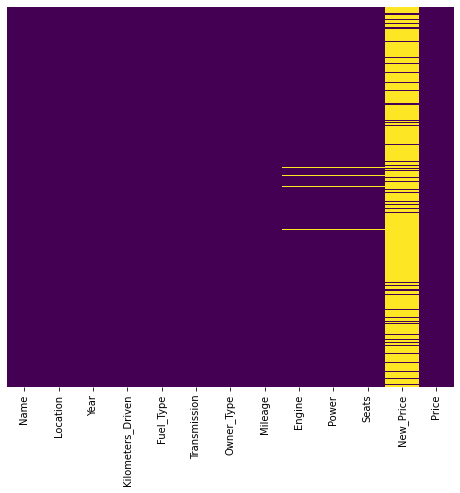

In [4]:
plt.figure(figsize=(8, 7))
sns.heatmap(Data_Cars.isnull(), cbar = False , yticklabels = False , cmap = 'viridis',)

In [5]:
#Il y a beaucoup de valeurs manquantes pour New_Prices 5195 sur 6019 , on choisit donc de cettre supprimer cette colonne
Data_Cars=Data_Cars.drop(['New_Price'],axis=1)


In [6]:
#Regardons maintenant
Data_Cars.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

Nombres de lignes manquantes pour Engine ,Power et Seats (dans la meme ligne) (36, 12)
(44, 12)


<AxesSubplot:>

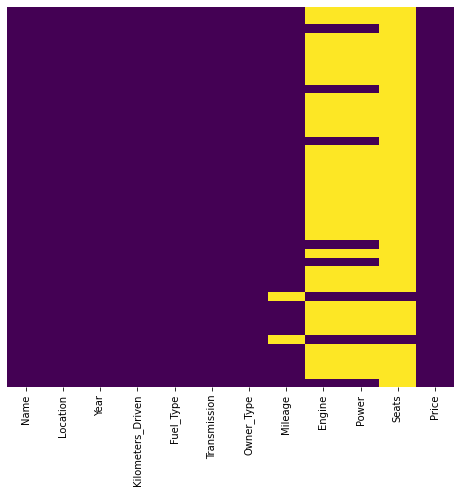

In [7]:
#Affichons les lignes de ces données manquantes
Missed_data=Data_Cars[((Data_Cars.isnull()['Engine']==True) | (Data_Cars.isnull()['Power']==True)) | (Data_Cars.isnull()['Seats']==True) |  (Data_Cars.isnull()['Mileage']==True)]
print("Nombres de lignes manquantes pour Engine ,Power et Seats (dans la meme ligne)" ,Data_Cars[((Data_Cars.isnull()['Engine']==True) & (Data_Cars.isnull()['Power']==True)) & (Data_Cars.isnull()['Seats']==True) ].shape)
print(Missed_data.shape)
plt.figure(figsize=(8, 7))
sns.heatmap(Missed_data.isnull(), cbar = False , yticklabels = False , cmap = 'viridis',)
#On remarque les 36 lignes manquantes pour Engine , Power et Seats sont les mêmes

In [9]:
# On aurait pu déterminer ces features grâce à une régression linéaire simple (en constatant une potentielle corrélation entre deux features ou en 
# remplaçant les valeurs manquantes par des valeurs moyennes/fréquentes. Cependant, on remarque que les valeurs manquantes le sont pour la même
# ligne et qu'elles ne représentent qu'une faible proportion de notre dataset (36/6029, soit 0,6%) : on peut donc les supprimer ainsi que les 
# 8 autres lignes comprenant des valeurs manquantes) ou les valeurs manquent)
Data_Cars=Data_Cars[((Data_Cars.isnull()['Engine']==False) & (Data_Cars.isnull()['Power']==False)) & (Data_Cars.isnull()['Seats']==False) & (Data_Cars.isnull()['Mileage']==False)]
# Supprimons par la même occasion les doublons
Data_Cars.drop_duplicates()
print(Data_Cars.shape)
print(Data_Cars.isnull().sum())
#On a gardé 5975 valeurs sur 6019, ce qui est très bien

(5975, 12)
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


# 2. Traitement des variables de type object



In [10]:
#Traitons mnt les variables de types object
#Affichons les
#Data_Cars.info()
Data_Cars.isnull().sum()


Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [11]:
#Commençons par convertir les variables Mileage , Engine , Power en nombre 
L=['Mileage','Engine','Power']
for l in L :
  d=Data_Cars[l].str.extract('([0-9]+)', expand=False)
  Data_Cars[l]=pd.to_numeric(d)

Data_Cars.isnull().sum()


Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                103
Seats                  0
Price                  0
dtype: int64

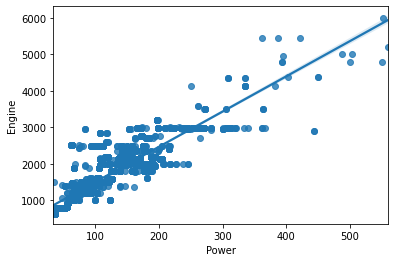

           Power    Engine
Power   1.000000  0.866521
Engine  0.866521  1.000000


In [12]:
#Convertir ces données nous a montré qu'il y avait 103 valeurs manquantes. Ces données là ont été mal renseignées : au liue d'avoir "null"
# ces données contiennent "null cc" ce qui explique pourquoi on n'a pas découvert ces données à l'étape précédente.
# Nous allons donc traiter ces données manquantes grâce à une régression linéaire simple (cf schéma)
sns.regplot(x=Data_Cars['Power'], y=Data_Cars['Engine'],fit_reg=True, order=1)
plt.show()
print(Data_Cars[['Power','Engine']].corr())


In [13]:
#On remarque que les données 'Power' et 'Engine' sont fortement correlées (0,86). 
#On procède donc à une interpolation pour remplacer les valeurs manquantes de 'Power'
Data_Cars[['Power','Engine']]=Data_Cars[['Power','Engine']].interpolate()
Data_Cars.isnull().sum()


Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [14]:
#Conversion des variables catégorielles : Fuel_Type , Transmission , Owner_Type , Name ,Location

# à ce stade, un questionnement se pose quant au choix du modèle : les modèles de régression multiple ainsi que 
#de régression par random forest semblent pertinentes ici auvu de la présence de features catégorielles et 
#de variables continues  
# Les variables catégoriles visibles sont : Name , Fuel_Type , Transmission et Owner_Type 

#Nous allons analyser nos variables par le biais de graphiques afin de voir quel modèle semble le plus adéquat.

for f in Data_Cars.columns:
  print( "Nombre de catégorie de "+f+" :",Data_Cars[f].value_counts().values.size)


Nombre de catégorie de Name : 1855
Nombre de catégorie de Location : 11
Nombre de catégorie de Year : 22
Nombre de catégorie de Kilometers_Driven : 3080
Nombre de catégorie de Fuel_Type : 4
Nombre de catégorie de Transmission : 2
Nombre de catégorie de Owner_Type : 4
Nombre de catégorie de Mileage : 28
Nombre de catégorie de Engine : 145
Nombre de catégorie de Power : 242
Nombre de catégorie de Seats : 9
Nombre de catégorie de Price : 1369


## 2.1. Analyse des données

In [15]:
# Les variables Year , Fuel_Type , Transmission , Owner_Type , Mileage , Mileage ,Seats sont clairement 
# des petites variables catégorielles plus adaptées pour un arbre
# Analysons les autres : Kilometers_Driven , Engine , Power  avec notre target : Price
SubD=Data_Cars[['Kilometers_Driven','Engine','Power','Price']]

<AxesSubplot:>

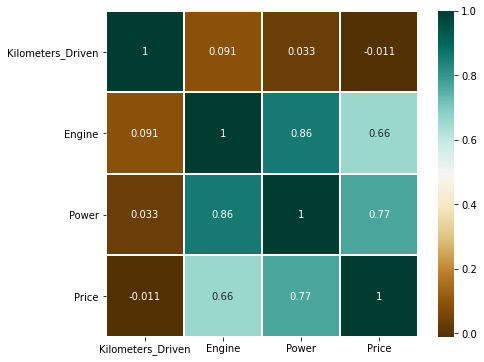

In [16]:
#Regardons si ces variables sont plutot linéaires entre elles et surout avec la variable target (prix )
corr_matrix = SubD.corr()
plt.figure(figsize=(7,6))
sns.heatmap(data = corr_matrix,cmap='BrBG', annot=True, linewidths=0.2)

#Donc voici la matrice de confusion:
#On peut déjà voir qu'il n'y pas de corrélation entre Kilometers_Driven avec les autres features

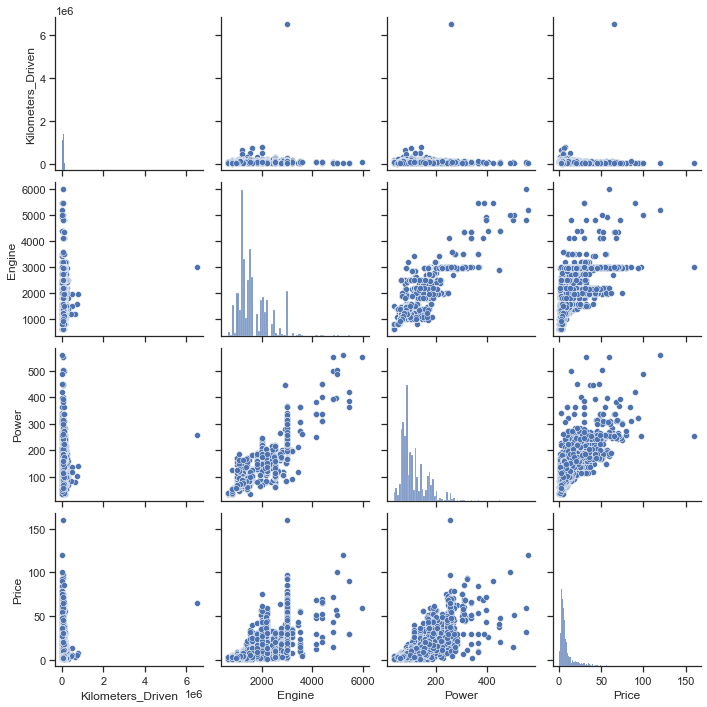

In [17]:
#On affiche un graphique qui visualise les données Kilometers_Driven , Engine , Power et Price entre elles
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(SubD)
#On observe que ces features ne semblent pas deux à deux liés puisqu'on voit graphiquement qu'il est impossible 
# de tracer une droite affine approchant de manière pertinente les différents nuages de points (à part pour power et Engine)
#En revanche, le modèle d'arbre nous permet de tracer des droites orthogonales sur l'axe des abscisse servant de 
#frontières à nos données à notre nuage de points.



In [18]:
#Pour s'en convaincre, on va couper nos valeurs de la variable Price en intervalle 
# comme sur le grahique ci-dessous, c'est à dire qu'on sépare nos datas en intervalles de tailles égales pour 
#avoir une meilleure visulation de nos données avec une dimension supérieure (couleur)
# Afin de pouvoir mieux visualiser si une méthode par arbre est adaptée 

<AxesSubplot:>

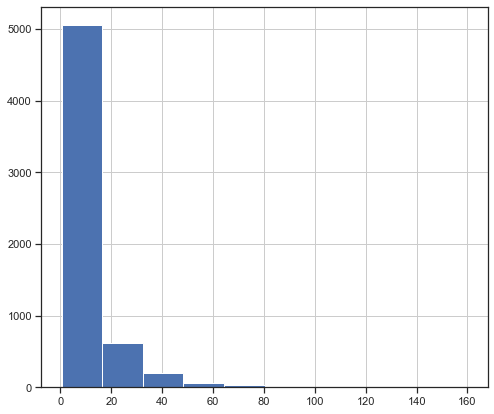

In [19]:
plt.rcParams.update({'font.size': 20, 'figure.figsize': (8, 7)}) 
Data_Cars['Price'].hist()

<AxesSubplot:>

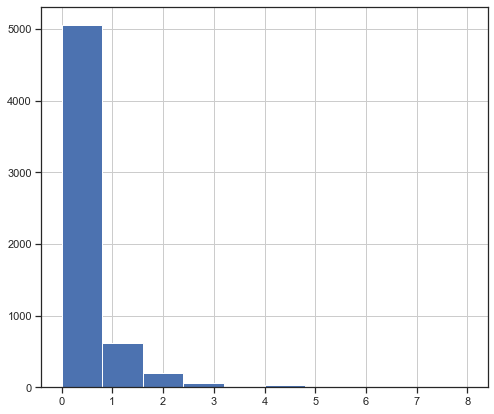

In [20]:
#On coupe nos données 
SubD['Price'] = pd.cut(Data_Cars['Price'], 10)
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
SubD['Price']=enc.fit_transform(SubD['Price'])
SubD['Price'].hist()
#Le découpage 
#les histogrammes concernant les valeurs continues et catégorielles coïncident : le découpage est donc réussi

In [21]:
#Voici donc nos nouvelles valeurs de prix 
SubD['Price'].value_counts()

0    5058
1     616
2     199
3      64
4      29
5       5
6       2
8       1
7       1
Name: Price, dtype: int64

In [22]:
def colorapply(x):
  if x==0:
    return "red"
  if x==1:
    return "blue"
  if x==2:
    return "yellow"
  if x==3:
    return "brown"
  if x==4:
    return "green"
  if x==5:
    return "purple"
  if x==6:
    return "black"
  if x==7:
    return "orange"
  if x==8:
    return "pink"

co = pd.Series(SubD['Price']).apply(colorapply)


<IPython.core.display.Javascript object>


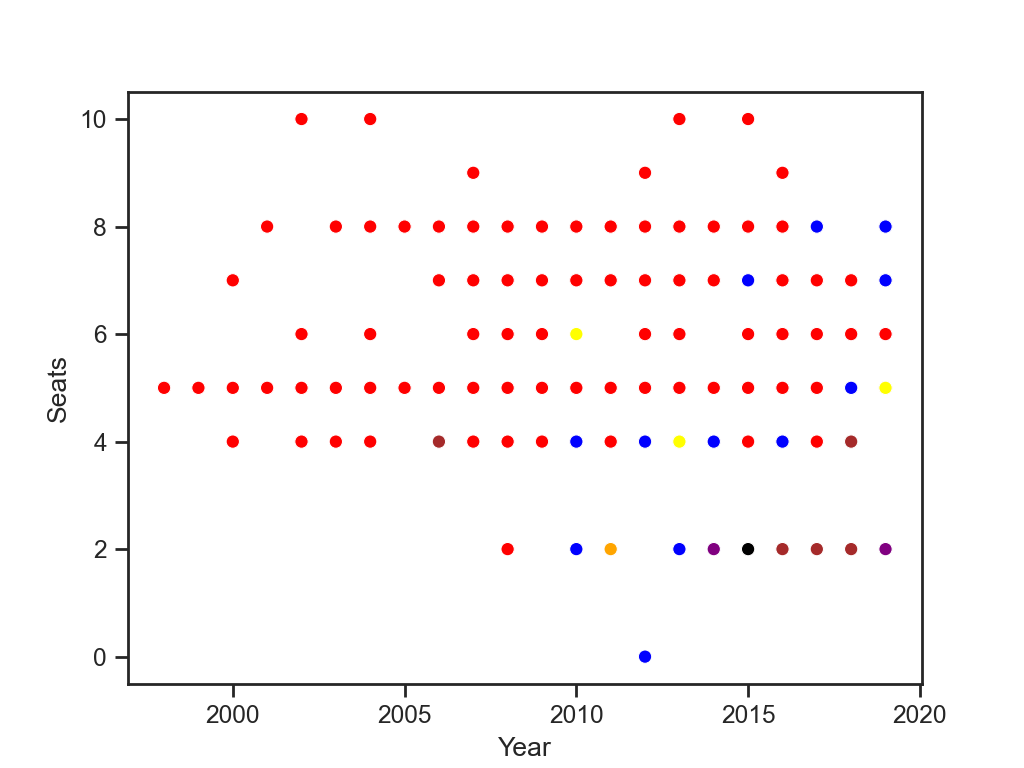

[]

In [23]:
%matplotlib notebook
sns.scatterplot(Data_Cars['Year'], Data_Cars['Seats'],c=co).plot()
#On voit dans ces 3 figures qu'on peut  tracer des droites orthogonales aux axes pour délimiter les différents 
#nuages de points associés à chaque couleur



<IPython.core.display.Javascript object>


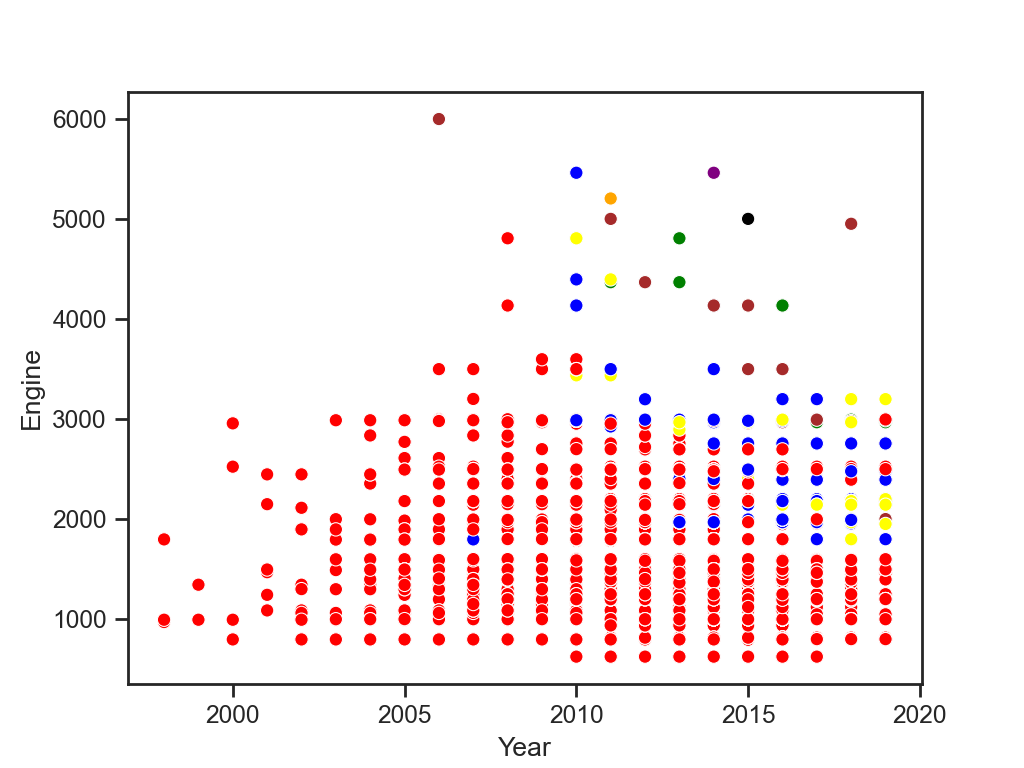

[]

In [24]:
%matplotlib notebook
sns.scatterplot(Data_Cars['Year'], Data_Cars['Engine'],c=co).plot()

<IPython.core.display.Javascript object>


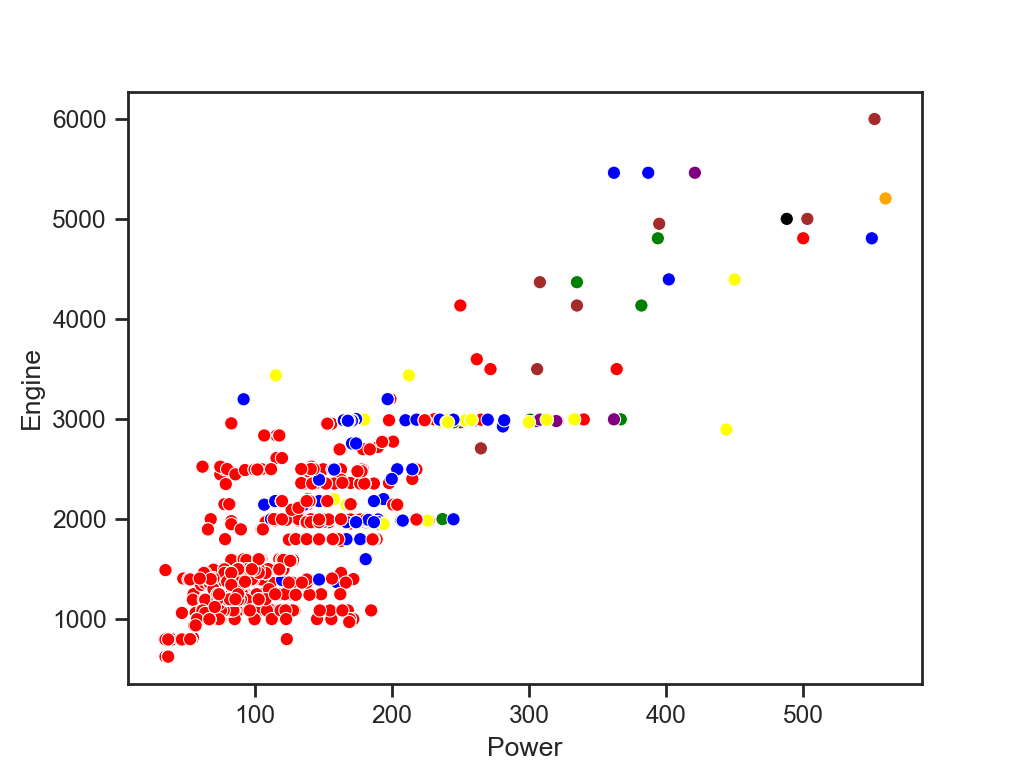

[]

In [25]:
%matplotlib notebook
sns.scatterplot(Data_Cars['Power'], Data_Cars['Engine'],c=co).plot()

<IPython.core.display.Javascript object>


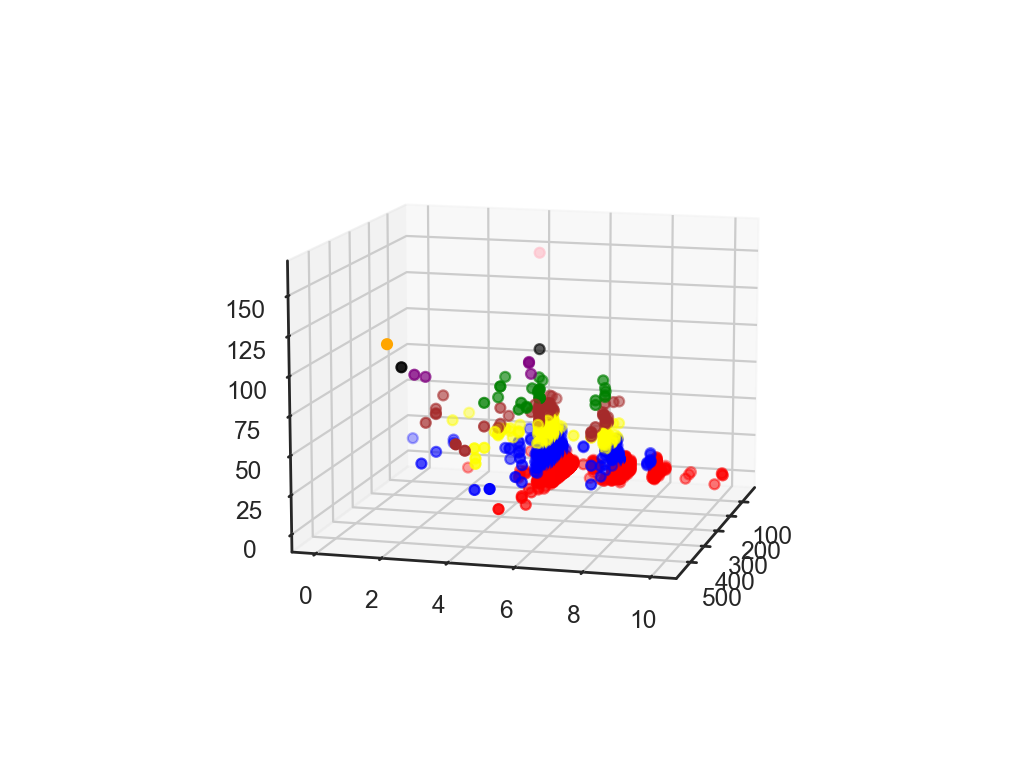

In [26]:
#Ici on voit que Les features power et Year en fonction de price ne permettent pas la construction d'un plan 
#approchant de manière pertinente les différents points
%matplotlib notebook
ax = plt.axes(projection='3d')
ax.scatter(Data_Cars['Power'], Data_Cars['Seats'], Data_Cars['Price'],c=co)

In [27]:
#Donc on conclut qu'un modèle de regression par arbre semble être plus adapté qu'une regression mutliple 
# Les variables à encoder sont de types objet
Data_Cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   int64  
 8   Engine             5975 non-null   int64  
 9   Power              5975 non-null   float64
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 606.8+ KB


## 2.2. Encodage

In [28]:
# L'encodage à choisir est très imporant : on a 2 encodages qu'on peut utiliser :
# -> Si on utilise un encodage qui ignore les relations d'ordres de nos features alors ceci va grandement impacter l'efficacité d'une régression multiple 
#    (car dans une régression multiple on utilise un calcul de distance qu'on chercher à minimiser entre notre variable target Y et X*B  )
# -> Dans le cas où on ignore les relations d'ordre on pourrait  utiliser un modèle basé sur les arbres . 
# En effet, les modèles par arbre sont par définition insensibles aux relations d'ordres.

# cela reviendrait donc à classer les features Fuel_Type , Transmission , Owner_Type en fonction du prix ce qui 
# est facile car chacune d'elle ne comporte pas beaucoup de catégories (voir en bas)
# Par contre la varibale Name peut prendre du temps à classer en fonction du prix car il existe un grqnd nombre de modèles de voitures
# différents: Nous allons donc encoder nos variables en fonction du prix pour ne pas se limiter par le choix d'un modèle 
# par la suite

In [29]:
#Encodage 
L=['Fuel_Type' , 'Transmission' , 'Owner_Type']
for l in L:
  print(Data_Cars[l].value_counts())

Diesel    3195
Petrol    2714
CNG         56
LPG         10
Name: Fuel_Type, dtype: int64
Manual       4266
Automatic    1709
Name: Transmission, dtype: int64
First             4903
Second             953
Third              111
Fourth & Above       8
Name: Owner_Type, dtype: int64


In [30]:
# Ici, nous allons encoder les varibales Transmission, Fuel_Type , Owner_Type selon le prix 
# De manière générale, à même modèle, une voiture automatique est plus chère qu'une manuelle
# On applique le même raisonement pour Fuel_Type et Owner_Type  
# Donc nous les classons selon leur prix de manière croissante
# Pour cela, pour chacune des catégories de chaque features, nous allons lui attribuer la moyenne de ses prix
# (utile pour une régression multiple car calcul de distance)

In [31]:
print(Data_Cars[['Transmission','Price']].groupby('Transmission').mean())
Data_Cars['Transmission']=Data_Cars['Transmission'].replace(['Manual','Automatic'],[5,20])

                  Price
Transmission           
Automatic     19.876852
Manual         5.345241


In [32]:
print(Data_Cars[['Fuel_Type','Price']].groupby('Fuel_Type').mean())
Data_Cars['Fuel_Type']=Data_Cars['Fuel_Type'].replace(['Diesel','Petrol','CNG','LPG'],[13,6,4,2])

               Price
Fuel_Type           
CNG         3.516786
Diesel     12.839934
LPG         2.487000
Petrol      5.721054


In [33]:
print(Data_Cars[['Owner_Type','Price']].groupby('Owner_Type').mean())
Data_Cars['Owner_Type']=Data_Cars['Owner_Type'].replace(['First','Second','Third','Fourth & Above'],[10,8,5,3])


                   Price
Owner_Type              
First           9.979721
Fourth & Above  3.396250
Second          7.622644
Third           4.956937


In [34]:
# Pour la varibale Name nous ne gardons que les 2 premiers mots (nom de la marque et nom du modèle de la voiture) 
# car ils résument de manière assez efficace la valeur d'une voiture (se limiter à deux mots nous convient puisque prendre en compte
# les différentes options d'une voiture complexifierait trop la base de données). Ainsi, on accepte de tronquer l'information
# mais cela nous permettra d'avoir un modèle qui ne se "reposera" pas uniquement sur le nom des voitures pour estimer le prix : 
# il devra prendre en compte d'autres features (ce qui tombe plutôt bien pour un projet de machine learning vu qu'on pourra mieux
# analyser l'importance des autres features pour la prédiction)

#On remarque qu'on a 213 catégories de Name. La marque et le modèle d'une voiture ont un impact direct sur le prix puisque plus
# une marque ou un modèle sont connus et prestigieux et plus ils coûtent cher. 
# On va donc encoder cette variable proportionnellement à la moyenne du prix de chaque catégorie 
# (très important pour le cacul de distance dans une Régression Multiple)
Coupage = Data_Cars["Name"].apply(lambda x: x.split())
Data_Cars["Name"] = Coupage.apply(lambda x: x[0]+ " "+x[1])
print(Data_Cars["Name"].value_counts().size)

213


In [35]:
# Comme on voit sur ce tableau le nom de la voiture sera encodé par son prix moyen 
# par exemple, une Audi A3 aura pour valeur 19.28
# Attention il faut s'assurer qu'on a bien 213 prix moyen comme ca on peut avoir une association bijective
# (pour éviter de regouper 2 noms dans une meme valeur ce qui biaiserait notre résultat)
T=Data_Cars[['Name','Price']].groupby('Name').mean()
T

,Price
Name,
Ambassador Classic,1.350000
Audi A3,19.287500
Audi A4,18.397051
Audi A6,22.058163
Audi A7,27.230000
...,...
Volvo S60,19.501429
Volvo S80,9.120000
Volvo V40,20.500000


In [36]:
# Cependant, il faut s'assurer qu'on ait bien 213 prix moyens afin d'avoir une association bijective
#(pour éviter de regouper 2 noms dans une même valeur ce qui biaiserait notre résultat)
# On remarque qu'on a 210 prix moyens , donc il faut dissocier ceux qui ont la même valeur en les 
#identifant
T['Price'].value_counts().size

210

In [37]:
#On affiche les noms des voiture qui ont le même prix moyen 
new_list = [] 
for i in list(T['Price']) : 
    if i not in new_list: 
        new_list.append(i)
    else:
        print(T['Price'][T['Price']==i])

Name
Ford Classic    3.0
Ford Fusion     3.0
Smart Fortwo    3.0
Name: Price, dtype: float64
Name
Fiat Petra     0.85
Maruti 1000    0.85
Name: Price, dtype: float64
Name
Ford Classic    3.0
Ford Fusion     3.0
Smart Fortwo    3.0
Name: Price, dtype: float64


In [38]:
#Ici on s'assure de les dissocier
T.loc['Ford Classic']=3.01
T.loc['Ford Fusion']=3.02
T.loc['Fiat Petra']=0.855

In [39]:
# Vérifions si toutes les valeurs sont difféentes (= si le nombre de valeurs est égal à 213)
T['Price'].value_counts().size
#On voit que ca marche donc on peut commencer l'encodage maintenant

213

In [40]:
#On encode name comme explique précédemment
for marque in T.index:
    Data_Cars['Name']=Data_Cars['Name'].replace([marque],T.loc[marque])

<IPython.core.display.Javascript object>


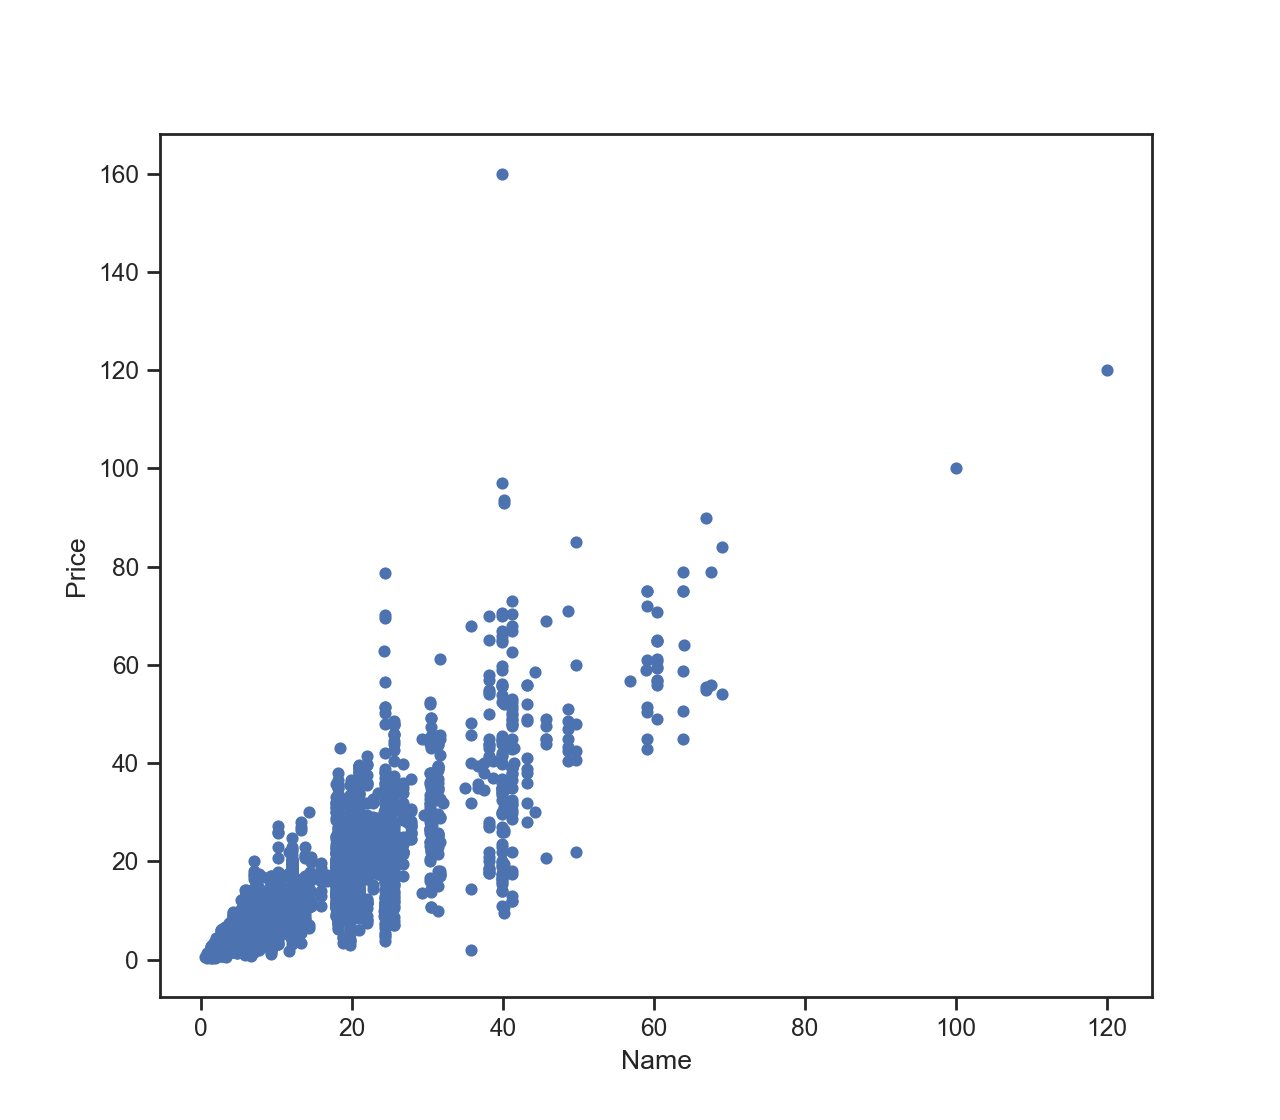

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


In [41]:
#Ici on remarque qu'il y a une corrélation élevée entre le nom et le prix: cela pourrait être interessant
# par la suite dans le cadre d'une régression multiple
plt.rcParams.update({'font.size': 20, 'figure.figsize': (8, 7)})
Data_Cars.plot(kind='scatter', x='Name', y='Price');

In [42]:
Data_Cars['Location'].value_counts().size

11

In [46]:
#Il nous reste à encoder la dernière varibale Location. Or au sein même d'un même pays, le lieu ne semble pas être lié au prix de vente.
# Ainsi, il serait judicieux dans le cadre d'une régression multiple d'utiliser un onehotencoder pour ne pas influencer les performances d'un modèle
#par régression multiple (cf précédemment, vis à vis du calcucl de distance)
# Le problème qu'on rencontre est qu'il y a 11 catégories différentes pour la variable Location (ce nombre pourrait être plus important si on devait
#étendre la base de données, comme dans un projet d'application). 
# Ainsi, si un onehotencoder pourrait nous aider, notre mémoire risque d'être chargée et le temps d'exécutiion de nos modèles serait + élevé.
# Nous allons donc utiliser un Label Encoder pour gagner de la vitesse d'exécution au risque d'impacter notre R.M. (puisque le temps d'exécution d'un 
# programme est également un critère important pour juger de sa qualité).

In [47]:
encoder=LabelEncoder()
Data_Cars["Location"]=encoder.fit_transform(Data_Cars["Location"])



In [48]:
Data_Cars

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2.829542,9,2010,72000,4,5,10,26,998,58.0,5.0,1.75
1,12.177634,10,2015,41000,13,5,10,19,1582,126.0,5.0,12.50
2,6.090526,2,2011,46000,6,5,10,18,1199,88.0,5.0,4.50
3,6.964800,2,2012,87000,13,5,10,20,1248,88.0,7.0,6.00
4,18.397051,3,2013,40670,13,20,8,15,1968,140.0,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,4.741312,4,2014,27365,13,5,10,28,1248,74.0,5.0,4.75
6015,4.715085,6,2015,100000,13,5,10,24,1120,71.0,5.0,4.00
6016,4.670000,6,2012,55000,13,5,8,14,2498,112.0,8.0,2.90
6017,2.829542,8,2013,46000,6,5,10,18,998,67.0,5.0,2.65


In [49]:
#Remarquons que nous n'avons plus de variables de type Object
Data_Cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   float64
 1   Location           5975 non-null   int64  
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   int64  
 5   Transmission       5975 non-null   int64  
 6   Owner_Type         5975 non-null   int64  
 7   Mileage            5975 non-null   int64  
 8   Engine             5975 non-null   int64  
 9   Power              5975 non-null   float64
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 606.8 KB


# 3.Analyse d'outliers
Ici, nous allons chercher à supprimer les valeurs aberrantes.
Celles-ci concernent les valeurs continues, à savoir : Engine , Power , Kilometers_Driven , Year , Mileage

<IPython.core.display.Javascript object>


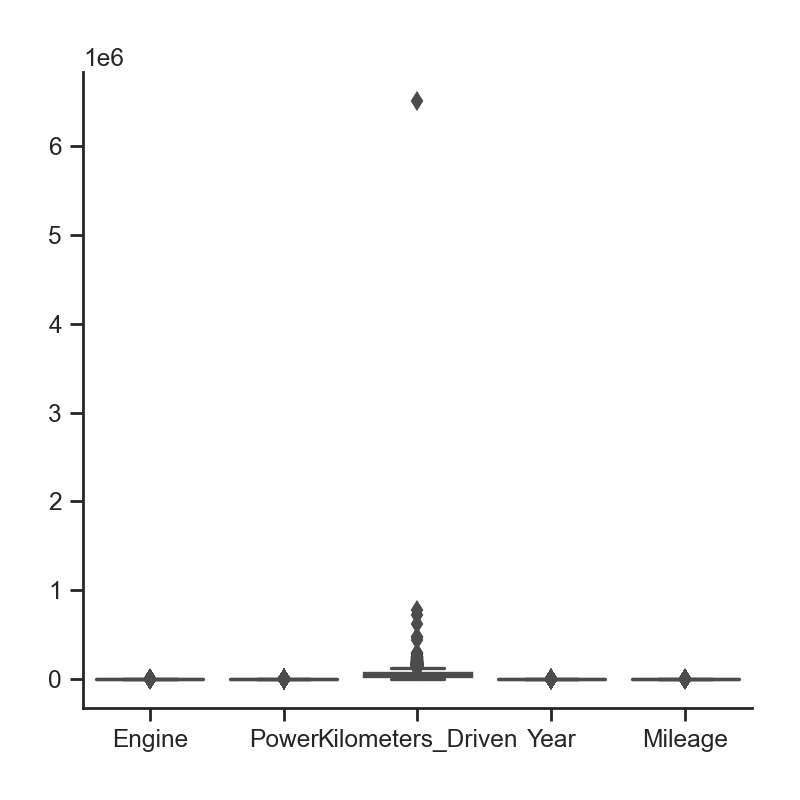

In [50]:
#On visulation nos outliers selon une box
L=['Engine' , 'Power' , 'Kilometers_Driven' , 'Year' , 'Mileage']
sns.factorplot(data=Data_Cars[L],kind='box')

In [51]:
from collections import Counter
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | 
                              (df[col] > Q3 + outlier_step )].index
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        #print(outlier_list_col)
   
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)  

    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers  

In [52]:
# Les outliers concernent les variables continues. 
# Ici, on ne touche pas aux variables catégorielles
# Comptons le nombre d'outliers
L=['Kilometers_Driven' , 'Engine' , 'Power' ,'Mileage','Year' ]
cmpt=0
for l in L:
    Out=detect_outliers(Data_Cars,0,[l])
    len_out=len(Out)
    cmpt=cmpt+len_out
    print("nombre outliers de  :",l," : ",len_out)
    Data_Cars.drop(Out, inplace=True)
    
print("Nombre outliers total :",cmpt)
print("%outliers  :",(cmpt/5975)*100)

nombre outliers de  : Kilometers_Driven  :  201
nombre outliers de  : Engine  :  60
nombre outliers de  : Power  :  193
nombre outliers de  : Mileage  :  61
nombre outliers de  : Year  :  105
Nombre outliers total : 620
%outliers  : 10.376569037656903


# 4.Normalisation des données

In [53]:
# Dans cette partie on normalise nos données pour les ramenener à la même échelle, ce qui est très important 
# quand on utilise une régression mais inutile pour regression par arbre car pas de calcul de distance entre les 
# features.
# D'un point de vue intuitif comme graphique, nous nous doutons qu'une régression par random forest sera 
# plus efficiente qu'une régression multiple linéaire comme expliqué ultérieurement. Normaliser nos données nous permet
# alors de confirmer cette intuition en ayant ainsi la possibilité de comparer les résultats de la régression multiple 
# simple(fraichement optimisés par la normalisation) avec la régression par random forest
# NB: On utilise une normalistion avec un Standard_Scaler quand nos variables sont continues et qui suivent 
# une loi normale dans ce cas on les normalisent (on centre et on réduit)
# Dans le cas où nos données ne sont pas continues(discret, classfiables) et on utilise un min_max scaler


In [54]:
#Les variables suivant une loi normale sont : Kilometers_Driven','Mileage','Power','Price','Year','Name','Engine'
#Comme on peut le voir sur les graphiques suivant

<IPython.core.display.Javascript object>


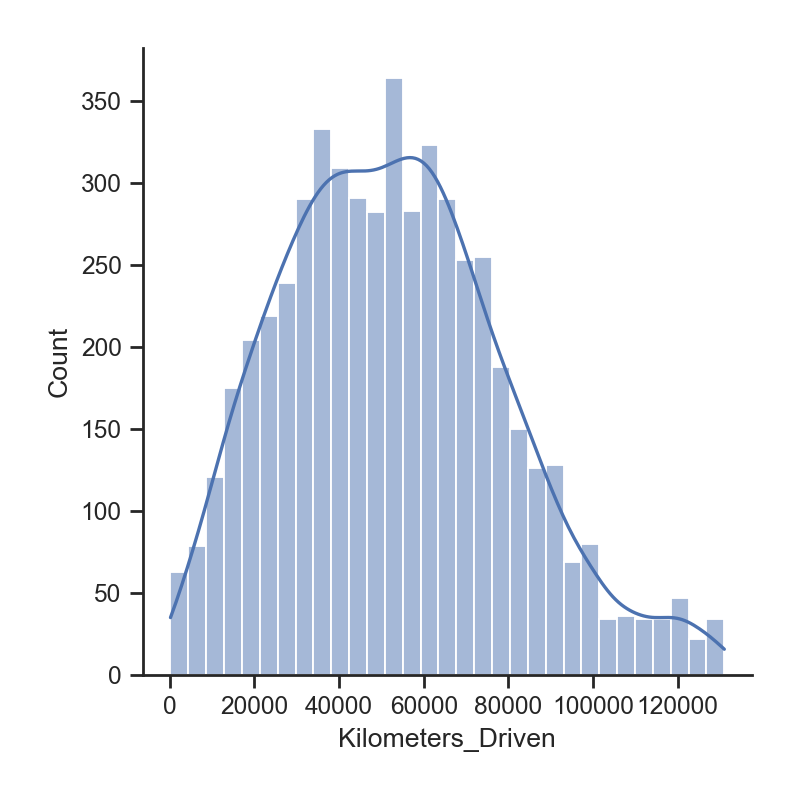

<IPython.core.display.Javascript object>


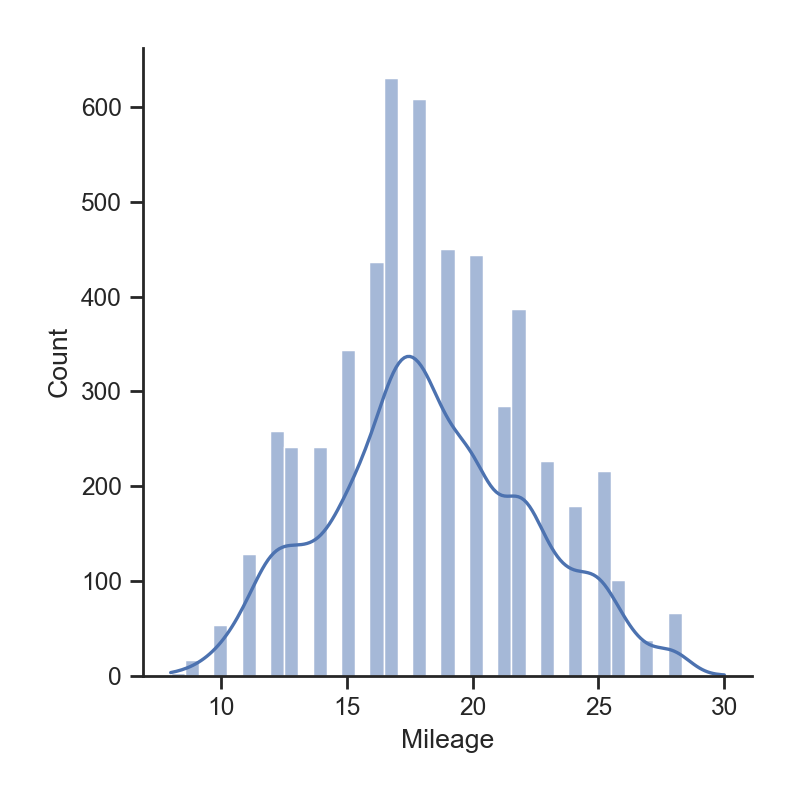

<IPython.core.display.Javascript object>


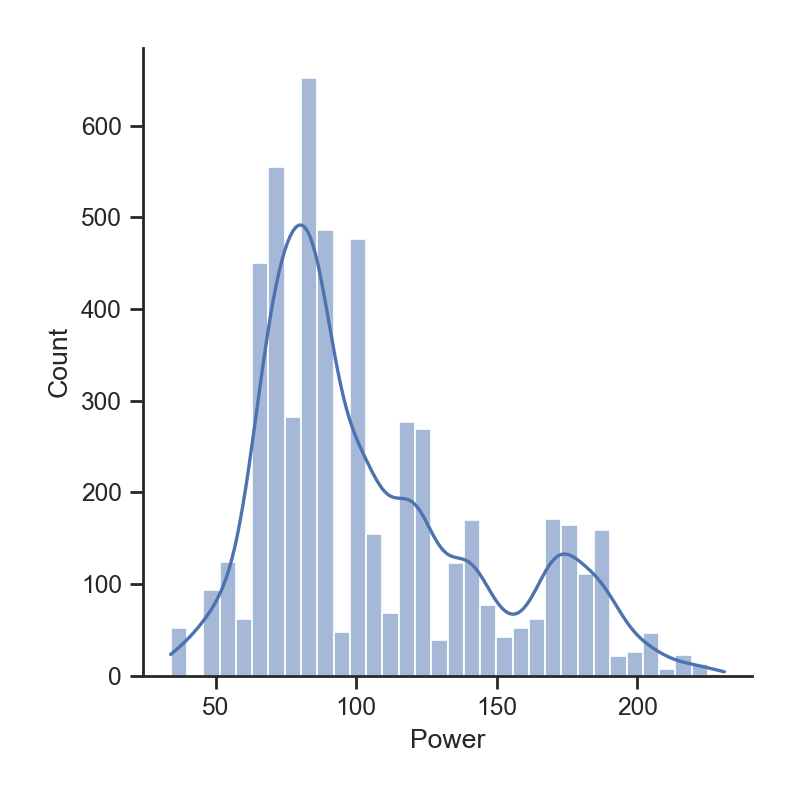

<IPython.core.display.Javascript object>


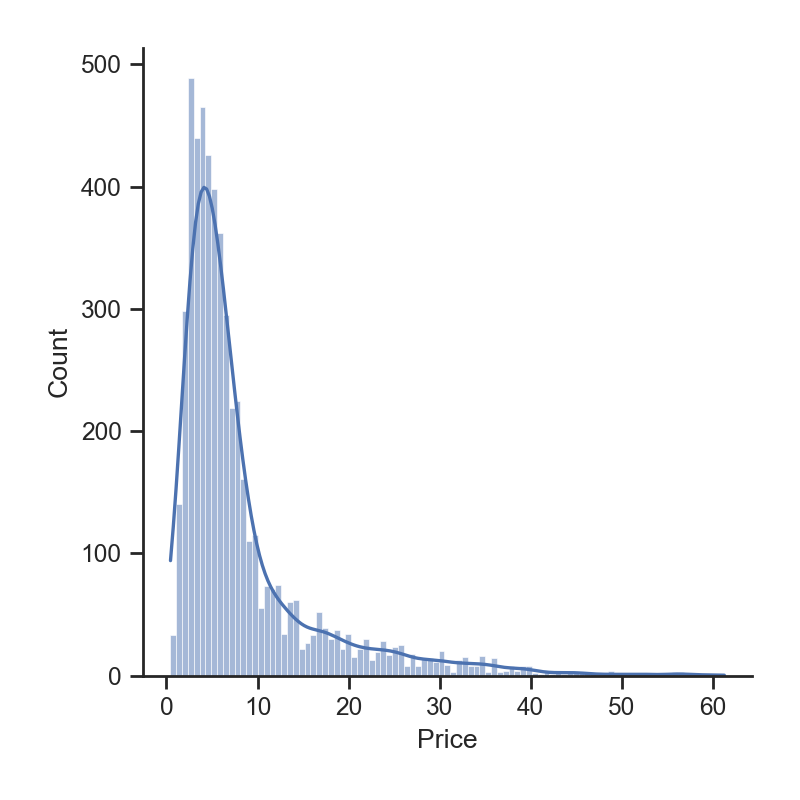

<IPython.core.display.Javascript object>


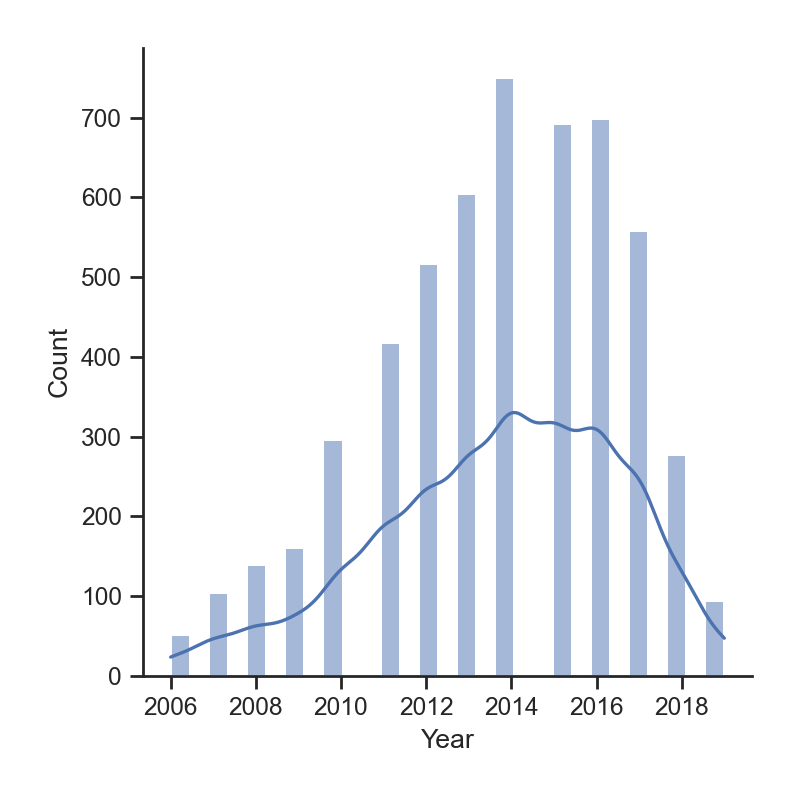

<IPython.core.display.Javascript object>


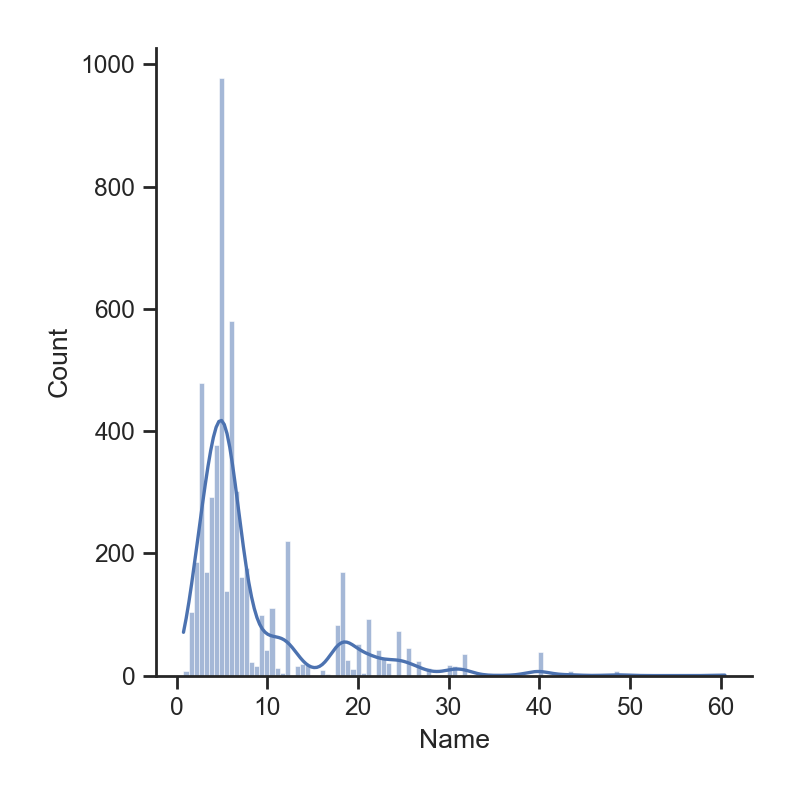

<IPython.core.display.Javascript object>


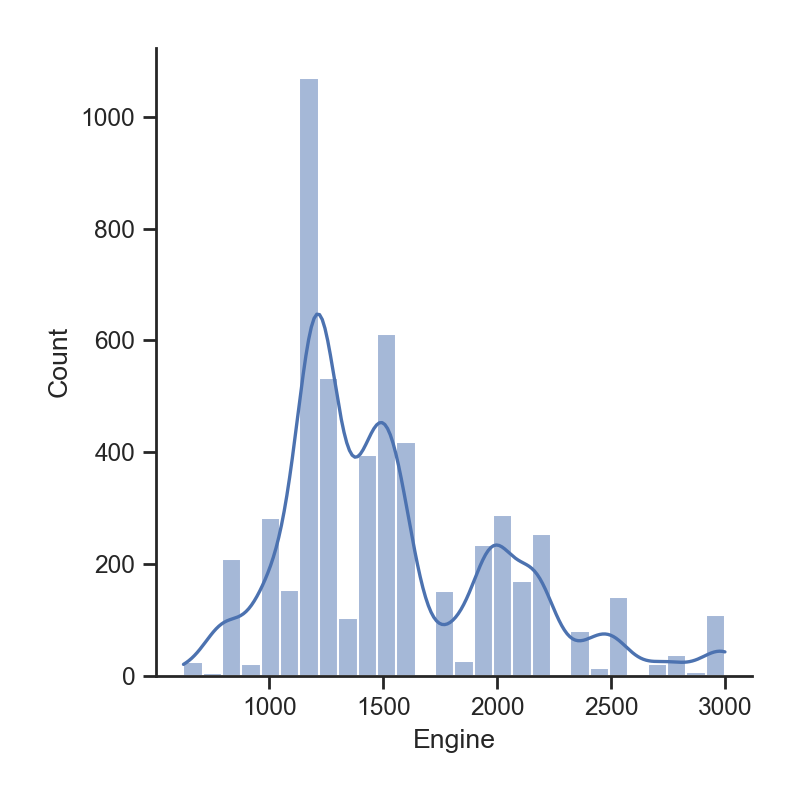

In [55]:
for i in ['Kilometers_Driven','Mileage','Power','Price','Year','Name','Engine']:
    sns.displot(Data_Cars, x=i, kde=True)

In [56]:
#On normalise 
Standard_Scaler= StandardScaler()
min_max_scaler = MinMaxScaler()
col_to_normalize=['Kilometers_Driven','Mileage','Power','Price','Year','Name','Engine']
col_to_min_max_scaler=['Owner_Type','Seats','Fuel_Type','Location']
for col in col_to_normalize:
    col_array=Data_Cars[col].values
    col_normalize=Standard_Scaler.fit_transform(col_array.reshape(-1, 1)) 
    Data_Cars[col]=col_normalize

for col in col_to_min_max_scaler:
    col_array=Data_Cars[col].values
    col_normalize=min_max_scaler.fit_transform(col_array.reshape(-1, 1)) 
    Data_Cars[col]=col_normalize

# 5.Réduction des données

In [ ]:
# Cette partie est utile quand on a beaucoup de données et qu'on veut les compresser afin d'avoir un traitement plus 
# rapide.
# En revanche, dans notre cas on n'a pas beacoup de données, donc cette étape nous semble inutile .

# 6.Etude des différents modèles 


In [57]:
# Dans cette partie nous avons décidé d'entrainer et de comparer nos données sur une régression multiple et 
# un random forest car ceux c'est qui nous semblent les plus adaptés comme nous l'avons analysé précedemment 
# Nous allons donc commencer par optimiser au mieux les hyperparamètres de chaque modèle et les analyser
# Puis nous allons les comparer et sélectionner le meilleur pour prédire nos valeurs test

# On commence par couper nos données avec 80% pour l'entrainement et 20% pour la prédiction
X=Data_Cars.drop(['Price'],axis=1)
y=Data_Cars['Price']
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2,shuffle=True,random_state=1)

## 6.1.Random Forest


In [59]:
#Commençons déjà par afficher le score de ce modèle sans l'optimiser
regressor = RandomForestRegressor()
regressor.fit(X_train,y_train)
print("score du train : ",regressor.score(X_train,y_train))
y_pred = regressor.predict(X_train)
print("erreur quadratique moyenne entre le predit et le train  : ",mean_squared_error(y_pred, y_train))
print("score du test : ",regressor.score(X_test,y_test))
y_pred = regressor.predict(X_test)
print("erreur quadratique moyenne entre le predit et le test  : ",mean_squared_error(y_pred, y_test))

score du train :  0.9928214094298288
erreur quadratique moyenne entre le predit et le train  :  0.007166396356555773
score du test :  0.9539515847104192
erreur quadratique moyenne entre le predit et le test  :  0.04635967084453239


In [60]:
# Nous obtenons déja d'excellent résultats, mais constatons tout de même un léger overfitting car le score du train
# est un peu supérieur (de 4%) à celui du test.
# Si notre score n'était pas assez élevé, on aurait pu modifier les différents hyperparamètres 
# (en l'occurence 'n_estimators' ). Or notre fonction de score est déjà très élevée (environ 0.94) : 
# l'optimisation aura donc ici comme but une réduction de l'overfitting (= surentrainement).
# L'overfitting peut être réduit par plusieurs manières. D'une part nous pouvons augmenter la taille de notre 
# dataset afin de ne pas surentraîner nos données. D'autre part, nous pouvons optimiser certains 
# hyperparamètres de notre régression par arbre ('max_depth' qui ont des valeurs par 
# défaut de base)
# Une autre méthode possible serait de retirer tous les features qui n’apportent rien. 
# Si deux variables sont corrélées par exemple, mieux vaut en retirer une. Si une variable a une variance trop 
# faible, elle n’impactera pas le phénomène étudié mais peut fausser les résultats.
# Une manière de faire ça est d’entraîner le modèle plusieurs fois. A chaque fois on retirerait une des features et 
# on étudierait l’impact sur l’entraînement du modèle.

# Nous expliciterons par la suite les différentes méthodes pour limiter l'overfitting

# Voici le score avant optimisation 
regressor = RandomForestRegressor()
cross_val_score(regressor, X_train, y_train, cv=3).mean()

0.9406716544879584

### 6.1.1. Méthode 1 : Optimisation des hyperparamètres

In [61]:
# Nous allons chercher la meilleur valeur de ce  paramétres qui permet de limiter aux mieux
# l'overfiting.
# Il faut faire attention dans cette partie à bien utiliser une cross validation quand on chercher à comparer nos
# modèle selon leur hyperparamètres car sans celle-ci nous pourront obtenir un résultat biaisé.
# 'max_depth': est l'hyperparamètre à optimiser car il permet de contrôler la profondeur de l'arbre, plus celui-ci 
# est grand, plus l'arbre est profond et donc précis et plus on tend vers l'overfiting 

In [62]:
val_score = []
for ma in range(1, 1000,100):
    regressor = RandomForestRegressor(max_depth = ma)
    score = cross_val_score(regressor, X_train, y_train, cv=3).mean()
    val_score.append(score)


<IPython.core.display.Javascript object>


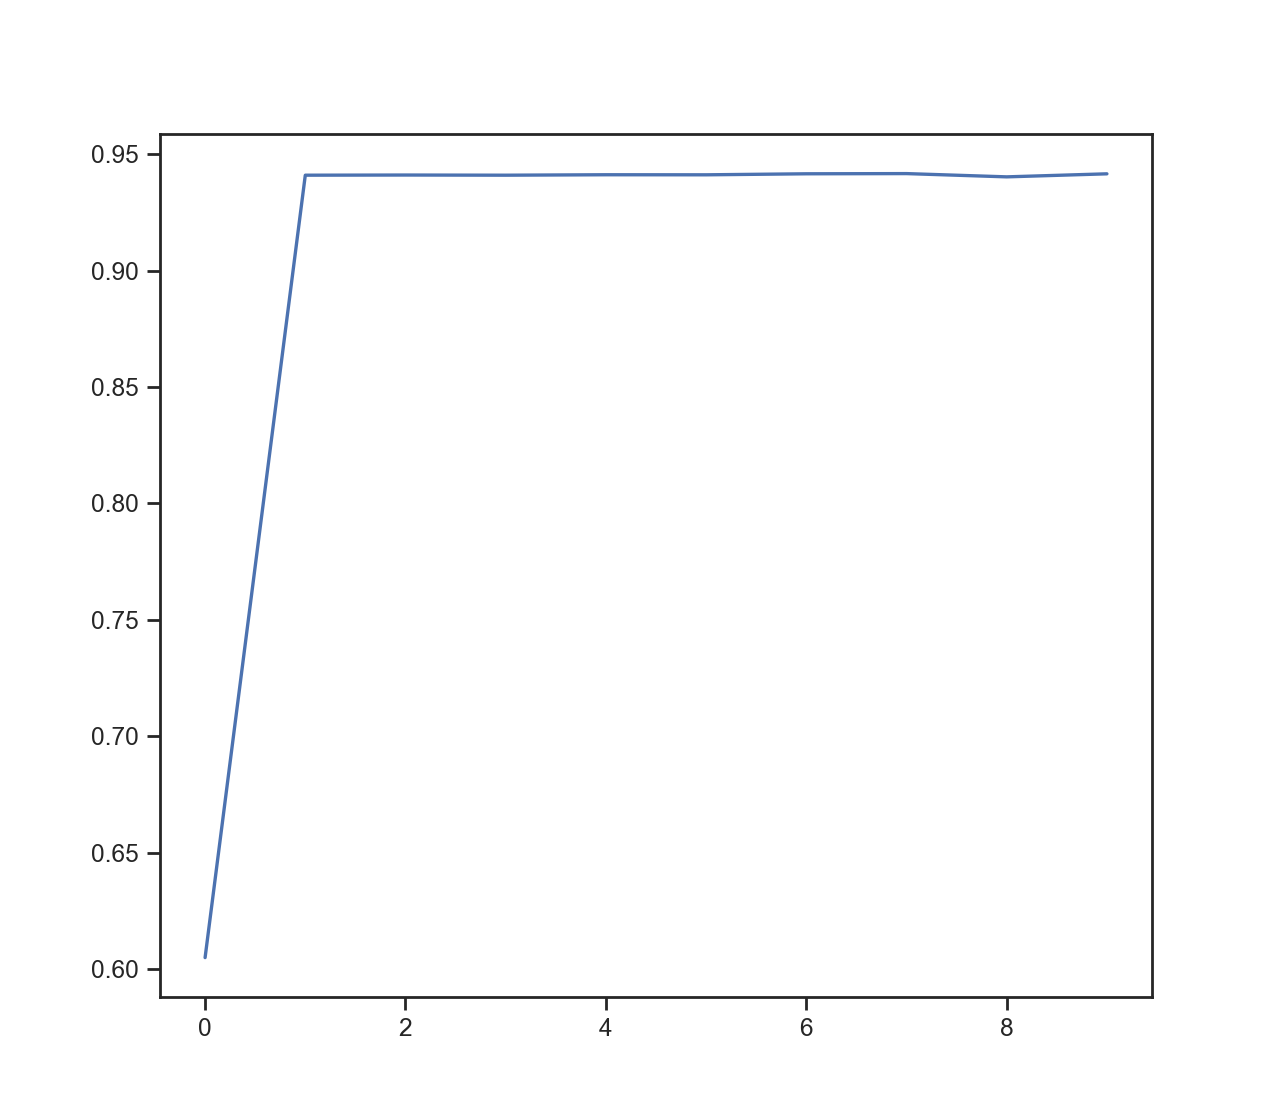

In [63]:
#On remarque que la fonction score est croissante et devient constante dès lors que la valeur de 
# notre hyperparamètre est supérieure à 2
%matplotlib notebook
plt.plot(val_score)

In [64]:
# Voici notre meilleur score après optimisation ; on remarque que le score n'a pas changé
max(val_score)

0.9416543373559483

In [65]:
# Le modèle atteint peut-être ses limites : voyons si le score augmente avec d'autres méthodes 
# avec les autres méthodes

### 6.1.2.  Méthode 2 : Analyse de la courbe d'apprentissage

In [66]:
# on va voir dans quelle mesure l'évolution de la quantité de données accordée au test entraîne une évolution de 
# notre fonction score
from sklearn.model_selection import learning_curve
regressor = RandomForestRegressor()
N, train_score, val_score = learning_curve(regressor, X_train, y_train,train_sizes=np.linspace(0.1, 1.0, 70), cv=3)

<IPython.core.display.Javascript object>


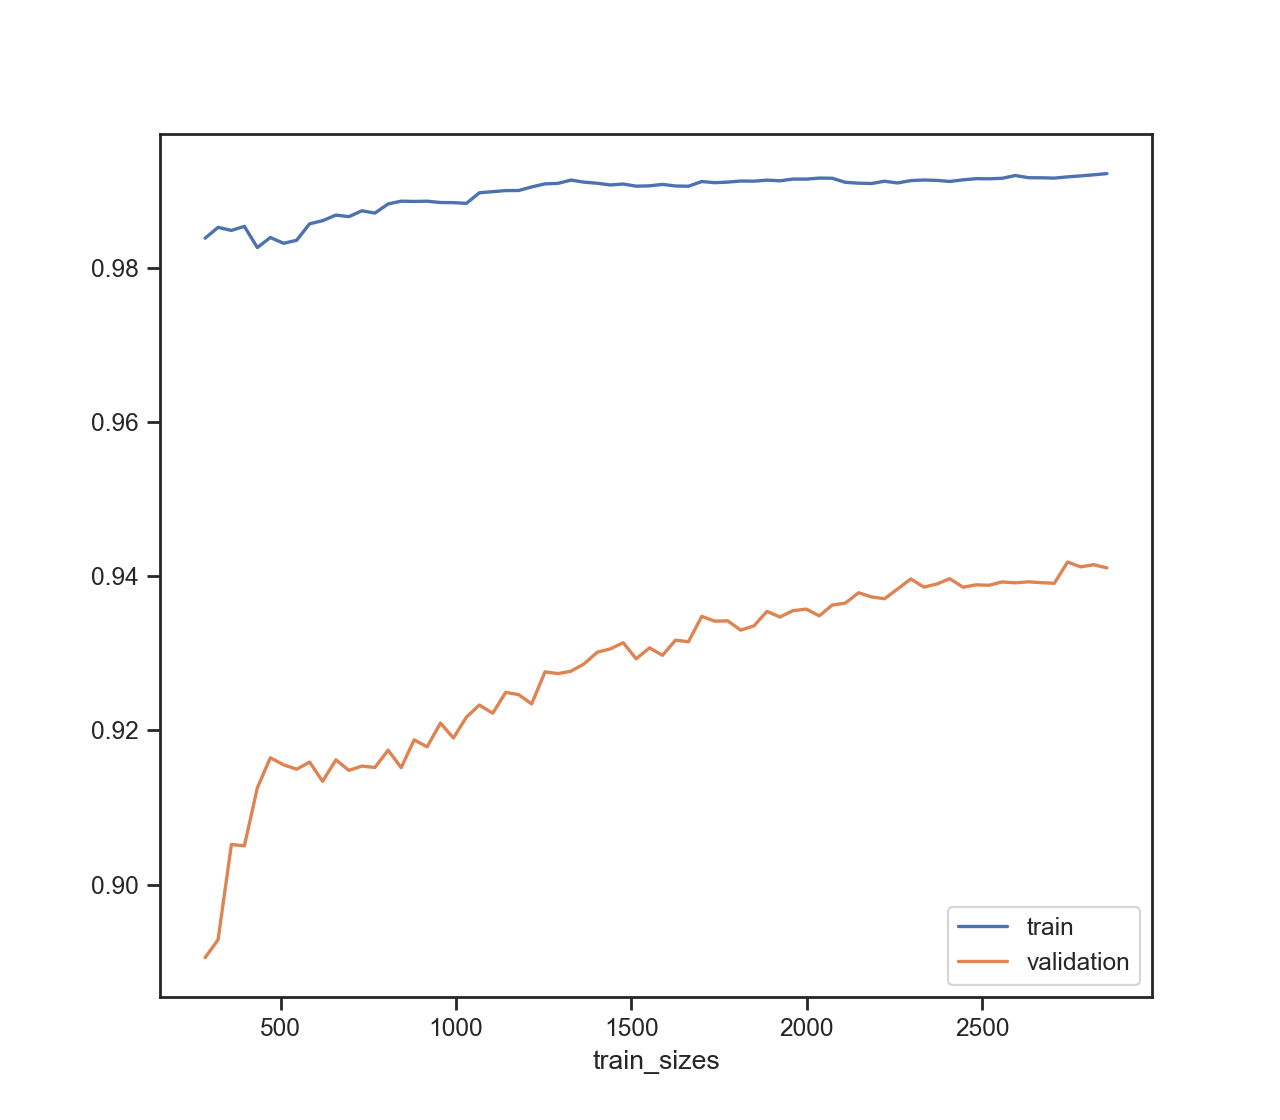

In [67]:
%matplotlib notebook
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

In [68]:
# On constate que l'augmentation du score en fonction de la quantité de données est globalement croissante 
# (ainsi, le score pourrait augmenter dans le cas hypothétique où on aurait plus de données)
# Ainsi, augmenter la taille de notre dataset pourrait améliorer notre score

### 6.1.3.  Méthode 3 : Sélection de features

In [69]:
v_score=[]
for f in list(X.columns):
    X2=X.drop([f],axis=1)
    v_score.append(cross_val_score(regressor, X2, y, cv=2).mean())

<IPython.core.display.Javascript object>


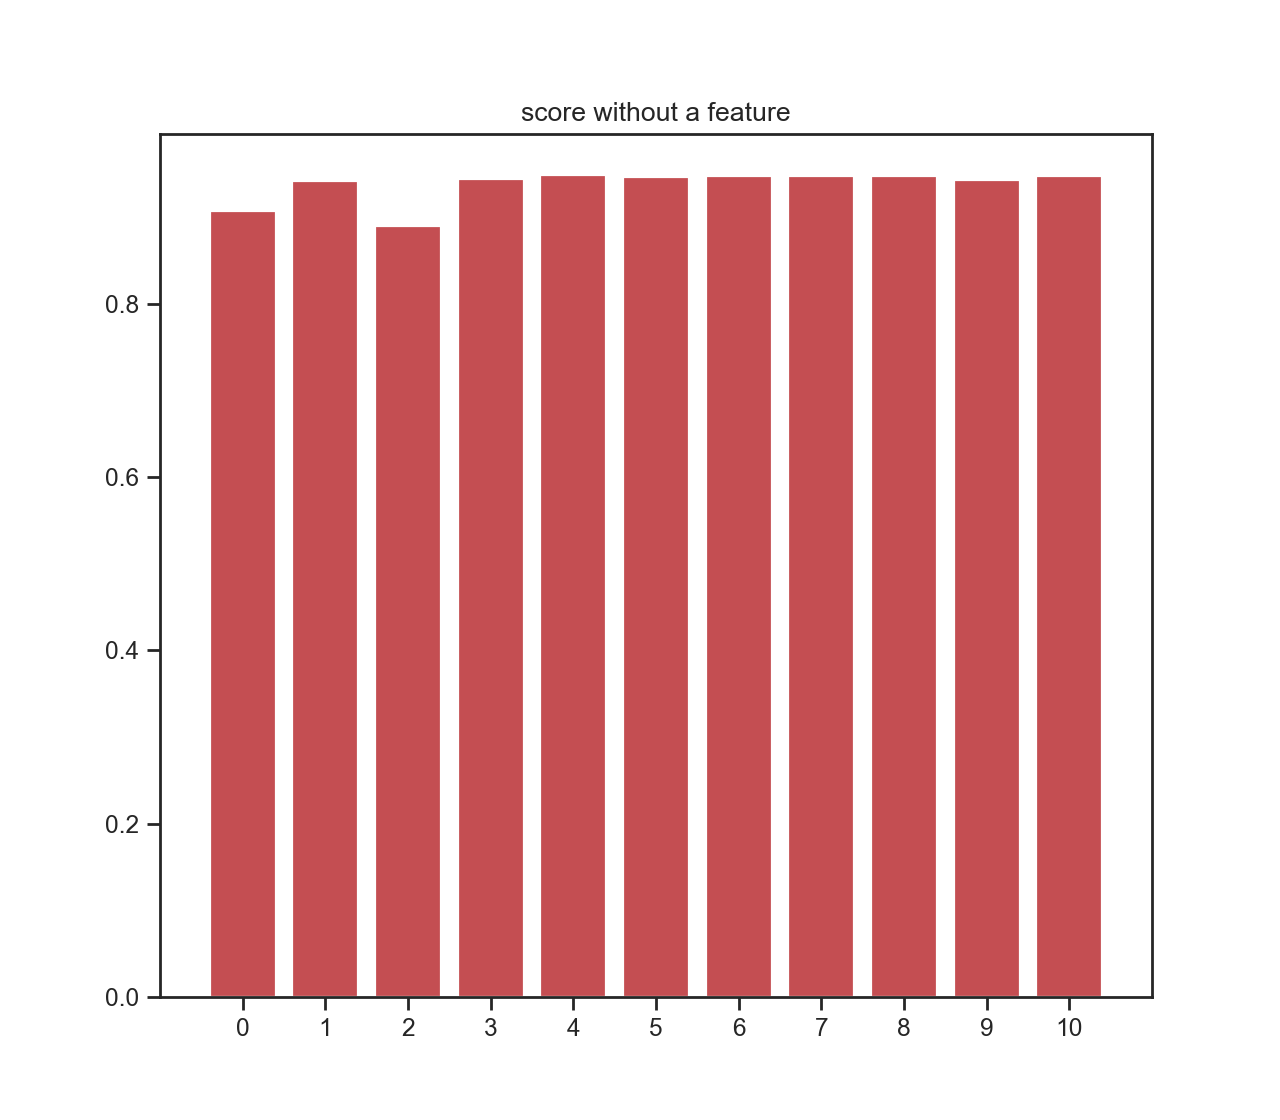

In [71]:
plt.figure()
plt.title("score without a feature")
plt.bar(range(X.shape[1]), v_score,color="r", align="center")
plt.xticks(range(X.shape[1]),range(X.shape[1]) )
plt.xlim([-1, X.shape[1]])
plt.show()

In [73]:
# on remarque que le score n' a pas augmenté (il ne dépasse pas le score d'avant optimisation : 0.95)

### 6.1.5. D'autres modèles d'arbres plus efficaces ?

In [74]:
# Les différentes méthodes d'optimisation vues précédemment ne permettent pas d'améliorer notre fonction 
# score : on a donc surement atteint les limites de notre modèle. On pourrait alors voir d'autres modèles 
# d'arbres limitant + l'overfitting, comme c'est le cas avec le modèle de boosting (dans lequel chaque arbre est 
# faible et en underfitting)

### 6.1.5. Analyse des performances du modèle  

In [75]:
regressor = RandomForestRegressor()
c=cross_validate(regressor, X_train, y_train, cv=5, scoring=('r2','neg_mean_squared_error'))

In [76]:
for k in c.keys():
    print(" voici le ",k," moyen : ", c[k].mean())

 voici le  fit_time  moyen :  1.044444751739502
 voici le  score_time  moyen :  0.02387537956237793
 voici le  test_r2  moyen :  0.9457670882851158
 voici le  test_neg_mean_squared_error  moyen :  -0.05401228756232172


<IPython.core.display.Javascript object>


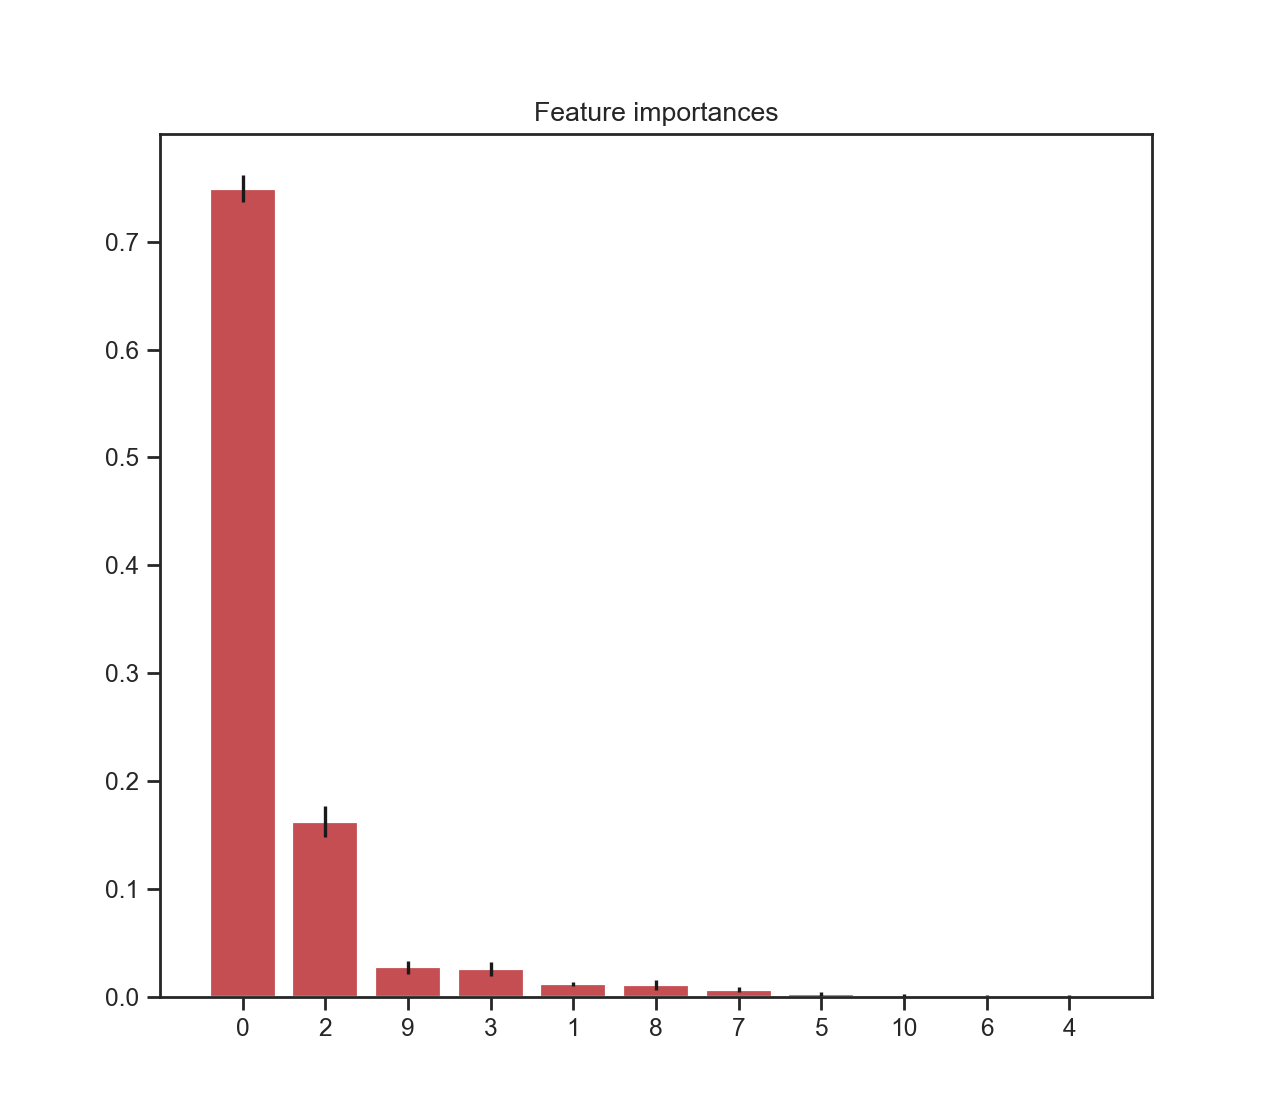

1. feature 0 (0.749267)  Name
2. feature 2 (0.162411)  Year
3. feature 9 (0.027280)  Power
4. feature 3 (0.025793)  Kilometers_Driven
5. feature 1 (0.011531)  Location
6. feature 8 (0.011149)  Engine
7. feature 7 (0.006719)  Mileage
8. feature 5 (0.002461)  Transmission
9. feature 10 (0.001388)  Seats
10. feature 6 (0.001301)  Owner_Type
11. feature 4 (0.000700)  Fuel_Type


In [77]:
#Pour finir on peut aussi voir quelles sont les features les plus importantes qui permetent de prédire le prix
feat_labels=Data_Cars.columns
regressor.fit(X_train,y_train)
importances = regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in regressor.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

for f in range(X.shape[1]):
    print("%d. feature %d (%f) " % (f + 1, indices[f], importances[indices[f]]),list(feat_labels)[indices[f]])

## 6.2.Régression Multiple

In [78]:
# Dans cette partie nous allons étudier la régression mutliple en essayant de l'optimiser, pour la comparer avec
# le modèle random forest 


In [79]:
#Commençons déjà par afficher le score de ce modéle sans l'optimiser
regressor=LinearRegression()
regressor.fit(X_train,y_train)
print("score du train : ",regressor.score(X_train,y_train))
y_pred = regressor.predict(X_train)
print("erreur quadratique moyenne entre le predit et le train  : ",mean_squared_error(y_pred, y_train))
print("score du test : ",regressor.score(X_test,y_test))
y_pred = regressor.predict(X_test)
print("erreur quadratique moyenne entre le predit et le test  : ",mean_squared_error(y_pred, y_test))

score du train :  0.8425141158460849
erreur quadratique moyenne entre le predit et le train  :  0.15721836415900503
score du test :  0.8448007391458702
erreur quadratique moyenne entre le predit et le test  :  0.15624830090820005


In [80]:
# on remarque que le score est plus faible qu'un random forest (de 10%) 
# Dans un régression multiple il n'y a pas de paramètre à optimiser ; par contre nous pouvons 
# "jouer" sur les données pour améliorer notre score.
# On a déjà effectué tous les pré-traitements nécessaires pour avoir le meilleur score possible.
# Pour améliorer le score de ce modèle, on peut au lieu d'utiliser une régression multiple "linéaire", opter pour
# une régression multiple "polynomiale" , c'est à dire :
# Dans une régression multiple linéaire, on essaye d'approcher notre nuage de données dans une dimension n par un hyperplan (dimension n-1)
# qui essaye de coller sur ce nuage on minimisant la distance avec l'hyperplan
# Par exemple dans le cas ou n=2, si nos données suivent une courbe parbolique il serait alors plus judicieux
# d'utiliser une fonction carré au lieu d'une simple droite linéaire pour approcher notre nuage de point
# Dans une dimension n=3 , on peut le voir comme un plan avec des courbre et non un plan plat 
# On va essayer de faire la meme chose mais avec une dimension supérieur 

In [81]:
# Ce code nous montre le score du modèle en fonction du degré polynomial choisi
L_score_train=[]
L_score_test =[]
for d in range(1,6):
    X=Data_Cars.drop(['Price'],axis=1)
    y=Data_Cars['Price']
    polynomial = PolynomialFeatures(degree=d, include_bias=False)
    X=polynomial.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.2,shuffle=True,random_state=1)
    regressor=LinearRegression()
    regressor.fit(X_train,y_train)
    L_score_train.append(regressor.score(X_train,y_train))
    L_score_test.append(regressor.score(X_test,y_test))
    
    

In [82]:
Array_score=np.array([L_score_train,L_score_test,list(range(1,6))])
Data_score=pd.DataFrame(np.transpose(Array_score),columns=['score_train', 'score_test','degre']) 
Data_score


,score_train,score_test,degre
0,0.842514,8.448007e-01,1.0
1,0.938358,9.421696e-01,2.0
2,0.954795,9.405769e-01,3.0
3,0.977423,-2.107100e+05,4.0
4,0.987555,-2.814274e+09,5.0


In [83]:
# D'après ce tableau on voit que les 2 meilleurs score pour le train sont pour un degre de 4 et 5
# Par contre leur score test sont très faible, encore plus pour le degre 5 :
# C'est typiquement un problème d'overfitting !
# Pour résoudre cela, nous allons utiliser un modèle de RM qui pénalise l'overfiting ie : ridge regression

### 6.2.1. Optimisation des hyperparamètres

In [84]:
# Nous allons trouver le meilleur score en fonction du degré et coefficient alpha qui pénalisent l'overfitting
# Biensur nous allons utiliser une cross validation pour trouver les meilleurs hyperparamètres sans obtenir un
# résultat biaisé
val_score=[]
degre=[]
alpha=[]
a=1
for d in range(3,6,1):
    X=Data_Cars.drop(['Price'],axis=1)
    y=Data_Cars['Price']
    polynomial = PolynomialFeatures(degree=d, include_bias=False)
    X=polynomial.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.2,shuffle=True,random_state=1)
    while a<=1000000000:
        regressor=Ridge(alpha=a)
        score=cross_val_score(regressor,X_train,y_train,cv=2,scoring='r2').mean()
        val_score.append(score)
        degre.append(d)
        alpha.append(a)
        a=a*5
    a=1

<IPython.core.display.Javascript object>


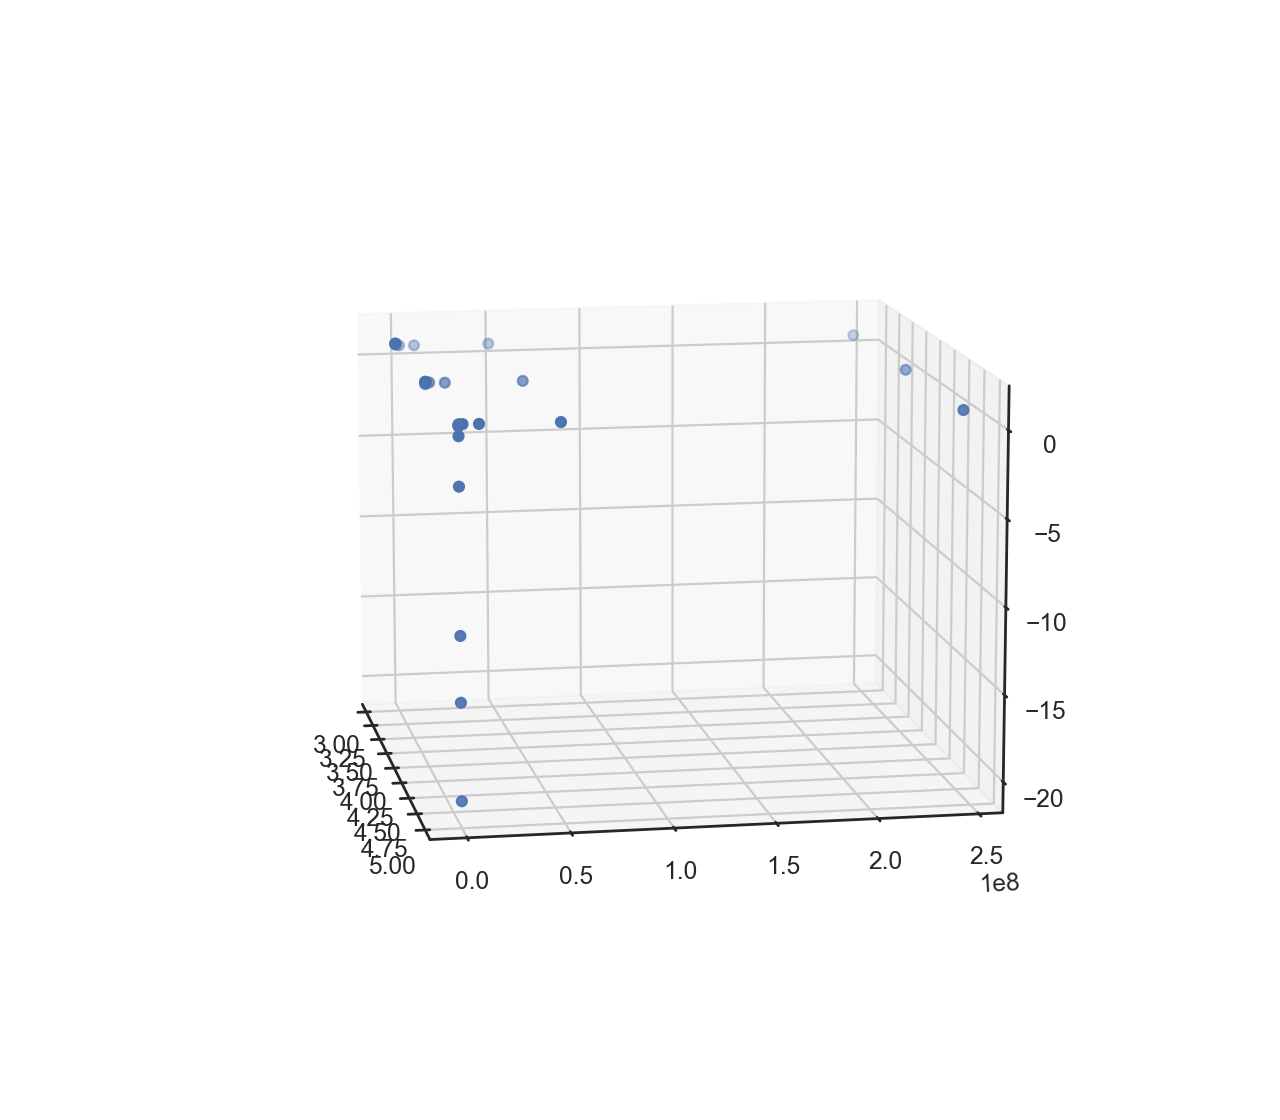

In [85]:
# Graphiquement ce schéma nous permet de voir le score maximum selon les différentes valeurs prises par le 
# degré et le alpha. Ainsi, chercher l'argmax de notre fonction score nous permet de trouver le couple 
# (degré,alpha) optimisant notre score.
%matplotlib notebook
ax = plt.axes(projection='3d')
ax.scatter(degre, alpha, val_score)

In [86]:
maxs=max(val_score)
i_maxs=val_score.index(maxs)
alpha=alpha[i_maxs]
degre=degre[i_maxs]
print("le meileur score est : ",maxs,",son degre = ",degre,", et son alpha = ",alpha)

le meileur score est :  0.9364562652326078 ,son degre =  3 , et son alpha =  625


### 6.2.2. Analyse des performances du modèle optimisé

In [87]:
X=Data_Cars.drop(['Price'],axis=1)
y=Data_Cars['Price']
polynomial = PolynomialFeatures(degree=degre, include_bias=False)
X=polynomial.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.2,shuffle=True,random_state=1)
regressor = Ridge(alpha=alpha)
c1=cross_validate(regressor, X_train, y_train, cv=5, scoring=('r2','neg_mean_squared_error'))

In [88]:
for k in c1.keys():
    print(" voici le ",k," moyen : ", c1[k].mean())

 voici le  fit_time  moyen :  0.02956843376159668
 voici le  score_time  moyen :  0.001405954360961914
 voici le  test_r2  moyen :  0.9388858623845124
 voici le  test_neg_mean_squared_error  moyen :  -0.06077918274849246


In [89]:
# Comme pour la régression par random forest, on remarque que les features les plus importants pour 
# déterminer le prix sont 'Name' et 'Year'
regressor = Ridge(alpha=alpha)
regressor.fit(X_train,y_train)
X=Data_Cars.drop(['Price'],axis=1)
X.feature_names=X.columns
D=pd.DataFrame(list(zip(X.feature_names,regressor.coef_)), columns = ['features', 'Coefficients'])
D.sort_values(by = 'Coefficients', ascending = False)

,features,Coefficients
0,Name,1.264425e-02
2,Year,1.122759e-02
8,Engine,5.610269e-03
9,Power,5.470949e-03
6,Owner_Type,2.241291e-03
4,Fuel_Type,1.893732e-03
10,Seats,1.396621e-03
5,Transmission,1.709375e-07
7,Mileage,-2.028776e-03
1,Location,-3.650498e-03


# 7. Conclusion : Choix du meilleur modèle

In [90]:
for k in c1.keys():
    print(" voici le ",k," moyen pour RM: ", c1[k].mean())
    print(" voici le ",k," moyen pour RF : ", c[k].mean())
#RM= regression multiple
#RF= random forest

 voici le  fit_time  moyen pour RM:  0.02956843376159668
 voici le  fit_time  moyen pour RF :  1.044444751739502
 voici le  score_time  moyen pour RM:  0.001405954360961914
 voici le  score_time  moyen pour RF :  0.02387537956237793
 voici le  test_r2  moyen pour RM:  0.9388858623845124
 voici le  test_r2  moyen pour RF :  0.9457670882851158
 voici le  test_neg_mean_squared_error  moyen pour RM:  -0.06077918274849246
 voici le  test_neg_mean_squared_error  moyen pour RF :  -0.05401228756232172


In [14]:
# On remarque que la vitesse d'apprentissage et d'évalutation la plus rapide est celle proposée par la 
# régression multiple (30x plus que le random forest). En revanche, le modèle par random forest est plus précis : 
# il évalue nos données avec une qualité supérieure.
# Toutefois, si l'apport de vitesse de la méthode par régression multiple est nette (30x plus qu'un RF), l'apport de 
# qualité d'une random forest est certes supérieur à celui d'une RM mais sans que l'écart entre les deux 
# qualités soit élevé. Finalement, l'apport de vitesse est considérablement plus satisfaisant que l'apport de qualité. # Ainsi, une régression multiple serait préférée dans notre cas.

# 8. Extension


In [15]:
#On peut noter que la métrique MSE n'est pas selon nous très pratique car celle-ci peut différer selon la mise 
#à l'échelle qu'on applique à nos features ou/et targets (ex normalisation , type d'encodage) ce qui est, certes 
# normal mais pas très pratique pour comparer le traitement de deux personne sur une base de données par 
# exemple. Il faudra donc s'assurer qu'une mise à l'échelle commune soit effectuée pour comparer.


In [ ]:
# Pour aller plus loin, on aurait pu utiliser la notion d'ensemble learning (présente dans une méthode de 
# random forest). L'ensemble learning pourrait ainsi combiner les méthodes de RF et de régression multiple. 
# Cependant, si une optimisation de la qualité serait indéniable, cette méthode aurait un coût à savoir une 
# augmentation considérable du temps d'exécution.